# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
# data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 3.1MB/s eta 0:00:01   67% |█████████████████████▌          | 9.8MB 42.9MB/s eta 0:00:01
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

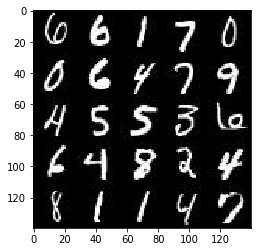

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

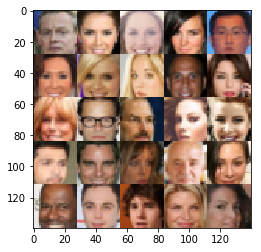

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    g_data = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels), name="g_data")
    z_data = tf.placeholder(tf.float32, (None, z_dim), name="z_data") 
    lr = tf.placeholder(tf.float32)
    return g_data, z_data, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start\n    handler_func(fd_obj, events)', 'File "/opt/conda/lib/

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [96]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        # input shape 28*28*3
        conv1 = tf.layers.conv2d(images, filters=64, kernel_size=5, strides=2, padding='same')
        act1 = tf.maximum(conv1 * alpha, conv1)
        drop1 = tf.nn.dropout(act1, keep_prob=0.5)
        bn1 = tf.layers.batch_normalization(drop1)

        # output shape 14*14*64
        conv2 = tf.layers.conv2d(bn1, filters=128, kernel_size=5, strides=2, padding='same')
        act2 = tf.maximum(conv2 * alpha, conv2)
        drop2 = tf.nn.dropout(act2, keep_prob=0.5)
        bn2 = tf.layers.batch_normalization(drop2)

        # output shape 7*7*128
        flat = tf.reshape(bn2, shape=(-1, 128*7*7))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [113]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("generator", reuse=not is_train):
#         g1 = tf.layers.dense(z, 4*4*512)
#         g1 = tf.reshape(g1, shape=(-1, 4, 4, 512))
#         bn1 = tf.layers.batch_normalization(g1)
#         ack1 = tf.maximum(alpha * bn1, bn1)
# #         print(ack1.shape)
        
# #         output 8*8*1024
#         g2 = tf.layers.conv2d_transpose(ack1, filters=256, kernel_size=3, strides=2, padding='same')
#         bn2 = tf.layers.batch_normalization(g2)
#         ack2 = tf.maximum(alpha * bn2, bn2)
# #         print(ack2.shape)
        
# #         output 8*8*256
#         g3 = tf.layers.conv2d_transpose(ack2, filters=128, kernel_size=3, strides=1, padding='valid')
#         bn3 = tf.layers.batch_normalization(g3)
#         ack3 = tf.maximum(alpha * bn3, bn3)
# #         print(ack3.shape)
        
#         g3 = tf.layers.conv2d_transpose(ack3, filters=128, kernel_size=3, strides=1, padding='valid')
#         bn3 = tf.layers.batch_normalization(g3)
#         ack3 = tf.maximum(alpha * bn3, bn3)
# #         print(ack3.shape)
        
# #         output 7*7*256
#         g4 = tf.layers.conv2d_transpose(ack3, filters=64, kernel_size=3, strides=1, padding='valid')
#         bn4 = tf.layers.batch_normalization(g4)
#         ack4 = tf.maximum(alpha * bn4, bn4)
# #         print(ack4.shape)
        
# #         output 14*14*128
#         g5 = tf.layers.conv2d_transpose(ack4, filters=out_channel_dim, kernel_size=3, strides=2, padding='same')
# #         g5 = tf.image.resize_images(g5, size=(28, 28))
#         out = tf.tanh(g5)
# #         print(out.shape)

        g1 = tf.layers.dense(z, 4*4*512)
        g1 = tf.reshape(g1, shape=(-1, 4, 4, 512))
        bn1 = tf.layers.batch_normalization(g1)
        ack1 = tf.maximum(alpha * bn1, bn1)
        # input 4*4*512
        g2 = tf.layers.conv2d_transpose(ack1, filters=256, kernel_size=3, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(g2)
        ack2 = tf.maximum(alpha * bn2, bn2)

        # output 8*8*256
        g3 = tf.layers.conv2d_transpose(ack2, filters=128, kernel_size=3, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(g3)
        ack3 = tf.maximum(alpha * bn3, bn3)
#         print(ack3.shape)
        
#         g4 = tf.layers.conv2d_transpose(ack3, filters=64, kernel_size=3, strides=2, padding='same')
#         bn4 = tf.layers.batch_normalization(g4)
#         ack4 = tf.maximum(alpha * bn4, bn4)
#         print(ack4.shape)
        
        #output 16*16*128
        g4 = tf.layers.conv2d_transpose(ack3, filters=out_channel_dim, kernel_size=3, strides=2, padding='same')
        g4 = tf.image.resize_images(g4, size=(28, 28))
        out = tf.tanh(g4)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [114]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_image = generator(input_z, out_channel_dim=out_channel_dim, is_train=True)
    
    d_real, d_real_logit = discriminator(images=input_real)
    d_fake, d_fake_logit = discriminator(images=g_image, reuse=True) 
    
    d_real_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logit, labels=tf.ones_like(d_real * 0.9))
    )
    d_fake_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logit, labels=tf.zeros_like(d_fake))
    )
    
    d_loss = d_real_loss + d_fake_loss
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logit, labels=tf.ones_like(d_fake))
    )
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [115]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    

    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)  
    with tf.control_dependencies(update_ops):  
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [116]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [117]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    show_n_images = 25
    
    input_real, input_z, learning_rate_ = model_inputs(image_height=data_shape[1],
                                                      image_width=data_shape[2],
                                                      image_channels=data_shape[3],
                                                      z_dim = z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    index = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, 
                                                     input_z: batch_z, 
                                                     learning_rate_: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z,
                                                     learning_rate_: learning_rate})
                index = index + 1
                
                if index % 100 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)
                

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 1.1698... Generator Loss: 1.0454


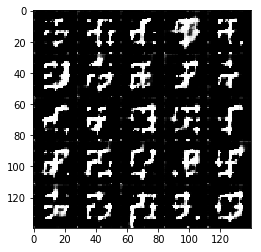

Epoch 1/2... Discriminator Loss: 1.0121... Generator Loss: 1.0945


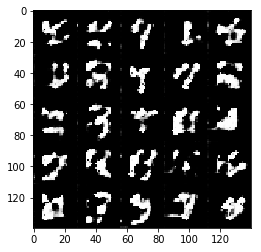

Epoch 1/2... Discriminator Loss: 1.1849... Generator Loss: 0.9661


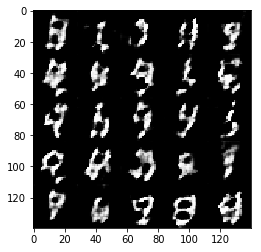

Epoch 1/2... Discriminator Loss: 1.2964... Generator Loss: 0.8501


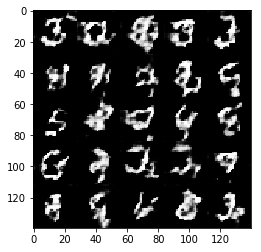

Epoch 1/2... Discriminator Loss: 1.3623... Generator Loss: 0.6830


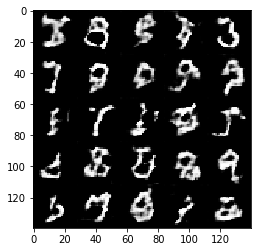

Epoch 1/2... Discriminator Loss: 1.1862... Generator Loss: 0.8824


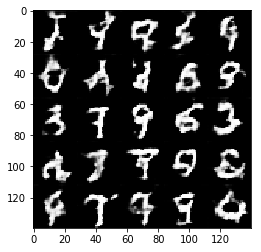

Epoch 1/2... Discriminator Loss: 1.0234... Generator Loss: 0.9716


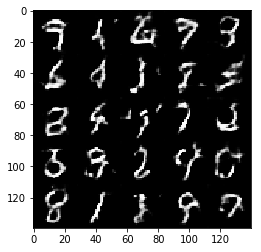

Epoch 1/2... Discriminator Loss: 1.2690... Generator Loss: 0.7544


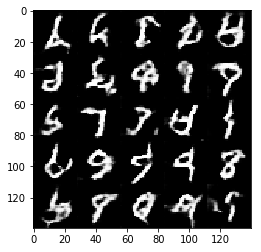

Epoch 1/2... Discriminator Loss: 1.2547... Generator Loss: 0.7632


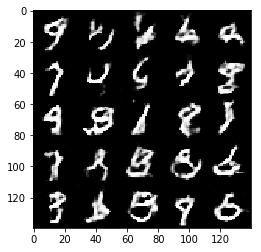

Epoch 2/2... Discriminator Loss: 1.5758... Generator Loss: 0.7411


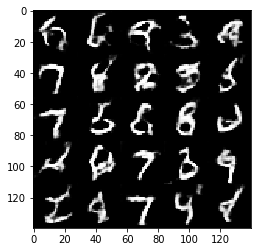

Epoch 2/2... Discriminator Loss: 1.3995... Generator Loss: 0.8052


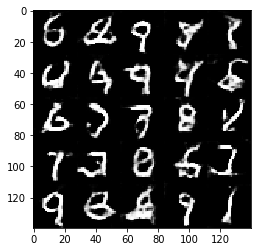

Epoch 2/2... Discriminator Loss: 1.2904... Generator Loss: 0.7980


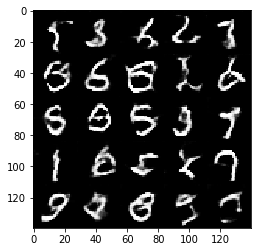

Epoch 2/2... Discriminator Loss: 1.3354... Generator Loss: 0.7152


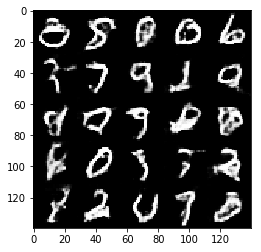

Epoch 2/2... Discriminator Loss: 1.3781... Generator Loss: 0.8275


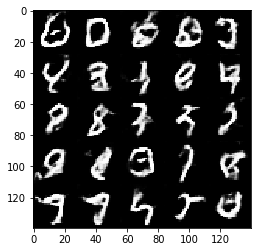

Epoch 2/2... Discriminator Loss: 1.4626... Generator Loss: 0.8008


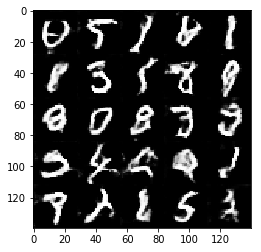

Epoch 2/2... Discriminator Loss: 1.3419... Generator Loss: 0.8745


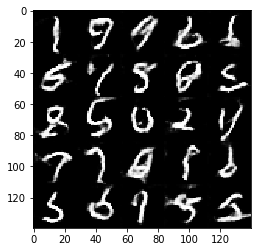

Epoch 2/2... Discriminator Loss: 1.2354... Generator Loss: 0.7550


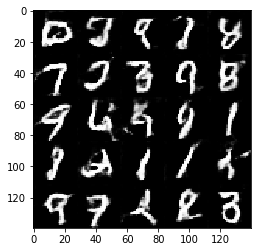

Epoch 2/2... Discriminator Loss: 1.2869... Generator Loss: 0.6967


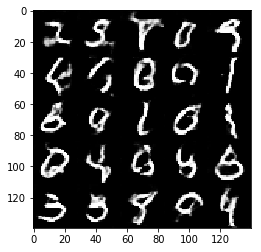

In [118]:
batch_size = 64
z_dim = 120
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss: 0.2779... Generator Loss: 2.3434


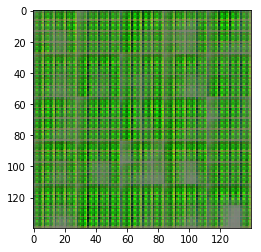

Epoch 1/1... Discriminator Loss: 0.5737... Generator Loss: 2.2492


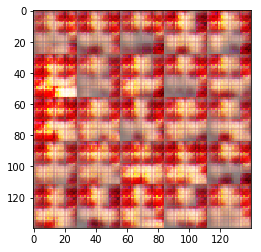

Epoch 1/1... Discriminator Loss: 0.9043... Generator Loss: 1.1870


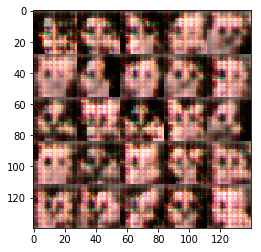

Epoch 1/1... Discriminator Loss: 1.1417... Generator Loss: 1.0448


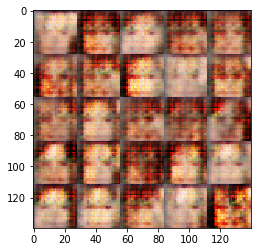

Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.7606


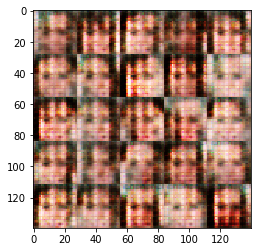

Epoch 1/1... Discriminator Loss: 1.2187... Generator Loss: 0.8926


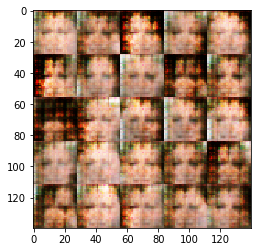

Epoch 1/1... Discriminator Loss: 1.4566... Generator Loss: 0.7395


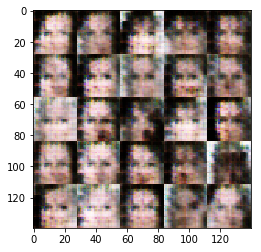

Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 0.8281


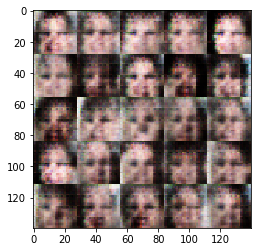

Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 0.7938


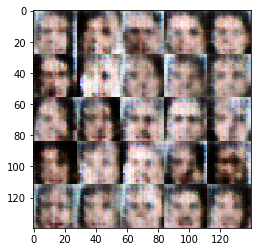

Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.7997


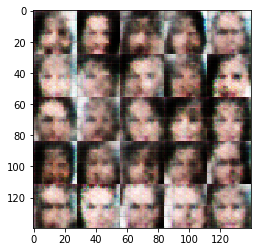

Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.7705


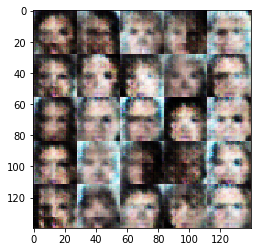

Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.7912


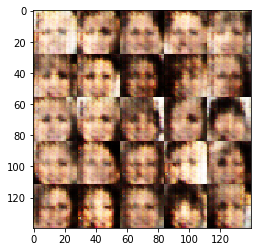

Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.6651


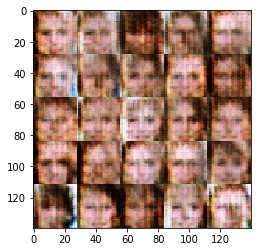

Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.8536


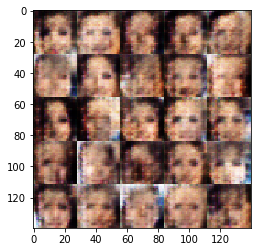

Epoch 1/1... Discriminator Loss: 1.3181... Generator Loss: 0.7735


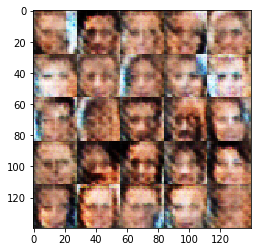

Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 0.8538


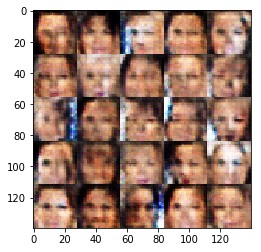

Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.7074


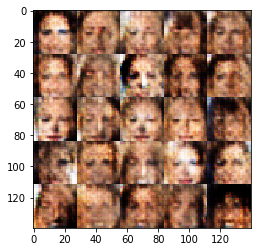

Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.8009


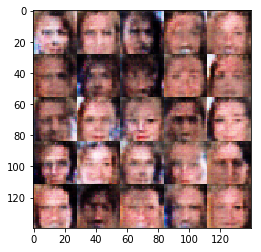

Epoch 1/1... Discriminator Loss: 1.2204... Generator Loss: 0.7717


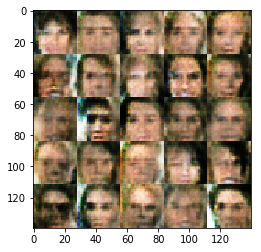

Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.7575


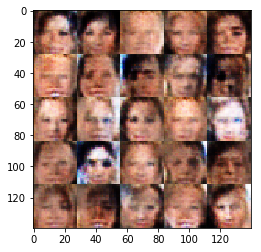

Epoch 1/1... Discriminator Loss: 1.3275... Generator Loss: 0.7371


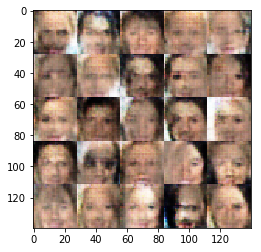

Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.8001


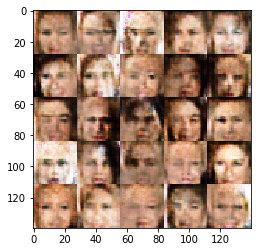

Epoch 1/1... Discriminator Loss: 1.3196... Generator Loss: 0.7263


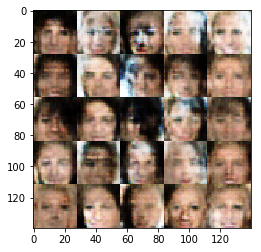

Epoch 1/1... Discriminator Loss: 1.2934... Generator Loss: 0.7784


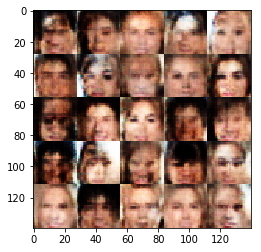

Epoch 1/1... Discriminator Loss: 1.1497... Generator Loss: 0.8727


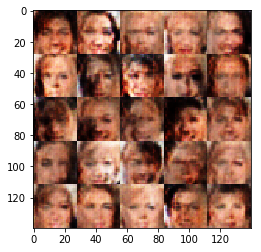

Epoch 1/1... Discriminator Loss: 1.3245... Generator Loss: 0.7444


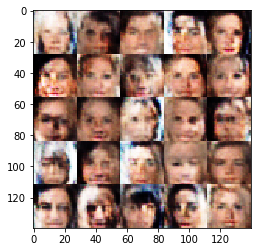

Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.7810


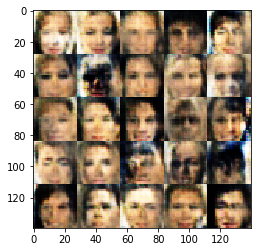

Epoch 1/1... Discriminator Loss: 1.4583... Generator Loss: 0.6799


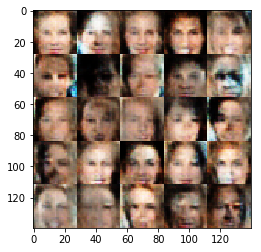

Epoch 1/1... Discriminator Loss: 1.2543... Generator Loss: 0.8924


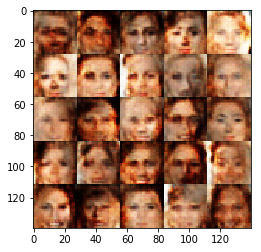

Epoch 1/1... Discriminator Loss: 1.3447... Generator Loss: 0.7141


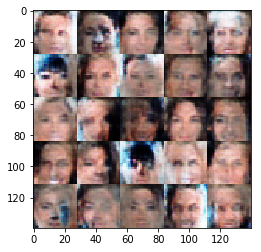

Epoch 1/1... Discriminator Loss: 1.3466... Generator Loss: 0.8368


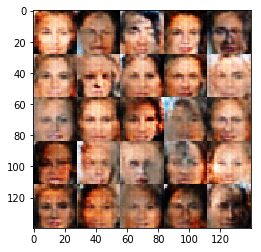

In [119]:
batch_size = 64
z_dim = 120
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。